# Sea ice in Climate Model


We will show the change of sea ice over time using CMIP5 models.

* Open datasets
* plot sea ice
* Make animation of sea ice variation
* Calculate global average sea ice fraction
* Make animation of sea ice fraction series
---

- Authors: NCI Virtual Research Environment Team
- Keywords: CMIP5, Sea Ice
- Create Date: 2020-Jul
    
---

### See what data are available

In [1]:
!ls /g/data/al33/replicas/CMIP5/combined/NOAA-GFDL/GFDL-CM3/historical/mon/seaIce/OImon/r1i1p1/v20110601/sic

sic_OImon_GFDL-CM3_historical_r1i1p1_186001-186412.nc
sic_OImon_GFDL-CM3_historical_r1i1p1_186501-186912.nc
sic_OImon_GFDL-CM3_historical_r1i1p1_187001-187412.nc
sic_OImon_GFDL-CM3_historical_r1i1p1_187501-187912.nc
sic_OImon_GFDL-CM3_historical_r1i1p1_188001-188412.nc
sic_OImon_GFDL-CM3_historical_r1i1p1_188501-188912.nc
sic_OImon_GFDL-CM3_historical_r1i1p1_189001-189412.nc
sic_OImon_GFDL-CM3_historical_r1i1p1_189501-189912.nc
sic_OImon_GFDL-CM3_historical_r1i1p1_190001-190412.nc
sic_OImon_GFDL-CM3_historical_r1i1p1_190501-190912.nc
sic_OImon_GFDL-CM3_historical_r1i1p1_191001-191412.nc
sic_OImon_GFDL-CM3_historical_r1i1p1_191501-191912.nc
sic_OImon_GFDL-CM3_historical_r1i1p1_192001-192412.nc
sic_OImon_GFDL-CM3_historical_r1i1p1_192501-192912.nc
sic_OImon_GFDL-CM3_historical_r1i1p1_193001-193412.nc
sic_OImon_GFDL-CM3_historical_r1i1p1_193501-193912.nc
sic_OImon_GFDL-CM3_historical_r1i1p1_194001-194412.nc
sic_OImon_GFDL-CM3_historical_r1i1p1_194501-194912.nc
sic_OImon_GFDL-CM3_historica

### Open data: sea ice area fraction (units: %)

In [1]:
import xarray as xr
data=xr.open_mfdataset('/g/data/al33/replicas/CMIP5/combined/NOAA-GFDL/GFDL-CM3/historical/mon/seaIce/OImon/r1i1p1/v20110601/sic/*', combine='nested', concat_dim='time')
data

<xarray.Dataset>
Dimensions:       (bnds: 2, rlat: 200, rlon: 360, time: 1752, vertices: 4)
Coordinates:
    lon           (rlat, rlon) float32 dask.array<chunksize=(200, 360), meta=np.ndarray>
    lat           (rlat, rlon) float32 dask.array<chunksize=(200, 360), meta=np.ndarray>
  * vertices      (vertices) int32 0 1 2 3
  * rlon          (rlon) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * rlat          (rlat) float64 -81.5 -80.5 -79.5 -78.5 ... 86.5 87.5 88.5 89.5
  * bnds          (bnds) float64 1.0 2.0
  * time          (time) object 1860-01-16 12:00:00 ... 2005-12-16 12:00:00
Data variables:
    average_DT    (time) timedelta64[ns] dask.array<chunksize=(60,), meta=np.ndarray>
    average_T1    (time) datetime64[ns] dask.array<chunksize=(60,), meta=np.ndarray>
    average_T2    (time) datetime64[ns] dask.array<chunksize=(60,), meta=np.ndarray>
    sic           (time, rlat, rlon) float32 dask.array<chunksize=(60, 200, 360), meta=np.ndarray>
    time_bnds     (time, bnds) object dask.array<chunksize=(60, 2), meta=np.ndarray>
    lat_vertices  (time, rlat, rlon, vertices) float64 dask.array<chunksize=(60, 200, 360, 4), meta=np.ndarray>
    lon_vertices  (time, rlat, rlon, vertices) float64 dask.array<chunksize=(60, 200, 360, 4), meta=np.ndarray>
Attributes:
    title:                  NOAA GFDL GFDL-CM3, historical (run 1) experiment...
    institute_id:           NOAA GFDL
    source:                 GFDL-CM3 2010 atmosphere: AM3 (AM3p9,C48L48); sea...
    contact:                gfdl.climate.model.info@noaa.gov
    project_id:             CMIP5
    table_id:               Table OImon (31 Jan 2011)
    experiment_id:          historical
    realization:            1
    modeling_realm:         seaIce ocean
    tracking_id:            c5cbaa28-8272-4065-b87b-404e96c1af8f
    Conventions:            CF-1.4
    references:             The GFDL Data Portal (http://nomads.gfdl.noaa.gov...
    comment:                GFDL experiment name: CM3Z_D1_1860-2005_AllForc_H...
    gfdl_experiment_name:   CM3Z_D1_1860-2005_AllForc_H1
    creation_date:          2011-08-21T23:39:45Z
    model_id:               GFDL-CM3
    branch_time:            0.0
    experiment:             historical
    forcing:                GHG,SA,Oz,LU,Sl,Vl,SS,BC,MD,OC (GHG includes CO2,...
    frequency:              mon
    initialization_method:  1
    parent_experiment_id:   piControl
    physics_version:        1
    product:                output1
    institution:            NOAA GFDL(201 Forrestal Rd, Princeton, NJ, 08540)
    history:                File was processed by fremetar (GFDL analog of CM...
    parent_experiment_rip:  r1i1p1

### Sea ice plotting 

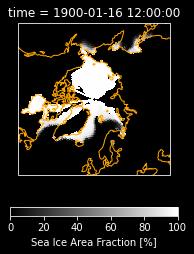

In [3]:
import cartopy.crs as ccrs
import numpy as np
from matplotlib import pyplot as plt, animation
plt.style.use('dark_background')
fig = plt.figure()
ax1 = plt.axes(projection=ccrs.NorthPolarStereo())
ax1.set_extent([-180,180,50,90], ccrs.PlateCarree())
#ax.stock_img()
data.sic.sel(time='1900-01').plot(ax=ax1, vmin=0, vmax=100, transform=ccrs.PlateCarree(central_longitude=0.0), add_colorbar=True, add_labels=True,  cmap='gray', cbar_kwargs=dict(orientation='horizontal',pad=0.15, shrink=0.5, spacing='proportional'))
ax1.coastlines(color='orange')


#### Animation

In [4]:
import cartopy.crs as ccrs
import numpy as np
from matplotlib import pyplot as plt, animation
import os
from IPython.display import display, HTML
plt.style.use('dark_background')
fig = plt.figure()

ax = []

colorlabel=np.linspace(-1, 1, 9)

for i in range(140):
    year=1860+i
    ax.append([])
    ax[i] = plt.axes(projection=ccrs.NorthPolarStereo())
    ax[i].set_extent([-180,180,50,90], ccrs.PlateCarree())
    data.sic.sel(time=str(year)+'-01').plot(ax=ax[i], vmin=0, vmax=100, transform=ccrs.PlateCarree(central_longitude=0.0), add_colorbar=True, add_labels=True,  cmap='gray', cbar_kwargs=dict(orientation='horizontal',pad=0.15, shrink=0.5, spacing='proportional'))
    ax[i].coastlines(color='orange')
    plt.title(f"Sea Ice Fraction {year}")                                                                   
    plt.savefig(f"image/Sea_Ice_Fraction_{year}.png")
    plt.close() 
    

/g/data/dk92/packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


URLError: <urlopen error [Errno 110] Connection timed out>

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x154c48f454d0> (for post_execute):


URLError: <urlopen error [Errno 110] Connection timed out>

URLError: <urlopen error [Errno 110] Connection timed out>

<Figure size 432x288 with 2 Axes>

In [ ]:
import glob
from PIL import Image
img, *imgs = [Image.open(f) for f in sorted(glob.glob('images/Sea_Ice_Fraction_*.png'))]
img.save(fp='images/correlation.gif', format='GIF', append_images=imgs,
         save_all=True, duration=200, loop=0)

In [5]:
!rm Sea_Ice_Fraction*.gif
!convert image/Sea_Ice_Fraction_*.png Sea_Ice_Fraction.gif
display(HTML("<img src='Sea_Ice_Fraction.gif' />"))


### Calculate global average sea ice fraction

In [6]:
# Weights with latitudes
weights = np.cos(np.deg2rad(data.rlat))
weights.name = "weights"
weights

<xarray.DataArray 'weights' (rlat: 200)>
array([0.14780941, 0.16504761, 0.18223553, 0.19936793, 0.21643961,
       0.23344536, 0.25038   , 0.26723838, 0.28401534, 0.3007058 ,
       0.31730466, 0.33380686, 0.35020738, 0.36650123, 0.38268343,
       0.39874907, 0.41469324, 0.4305111 , 0.44619781, 0.46174861,
       0.47715876, 0.49242356, 0.50753836, 0.52249856, 0.53729961,
       0.55193699, 0.56640624, 0.58070296, 0.59482279, 0.60876143,
       0.62251464, 0.63607822, 0.64944805, 0.66262005, 0.67559021,
       0.68835458, 0.70090926, 0.71325045, 0.72537437, 0.73727734,
       0.74895572, 0.76040597, 0.77162458, 0.78260816, 0.79335334,
       0.80385686, 0.81411552, 0.82412619, 0.83388582, 0.84339145,
       0.85264016, 0.86162916, 0.8703557 , 0.87880524, 0.88695357,
       0.89478018, 0.90226855, 0.90940632, 0.91618532, 0.9226015 ,
       0.92865479, 0.93434883, 0.93969063, 0.94469022, 0.94936018,
       0.9537152 , 0.95777164, 0.96154702, 0.96505957, 0.96832782,
       0.97137015, 0.97420443, 0.97684763, 0.97931554, 0.98162244,
       0.98378085, 0.98580133, 0.98768274, 0.9894158 , 0.99099479,
       0.99241755, 0.99368525, 0.99480212, 0.99577497, 0.99661271,
       0.99732578, 0.99792558, 0.99842394, 0.99883265, 0.999163  ,
       0.99942543, 0.99962927, 0.99978249, 0.99989162, 0.99996161,
       0.99999577, 0.99999577, 0.99996161, 0.99989162, 0.99978249,
       0.99962927, 0.99942543, 0.999163  , 0.99883265, 0.99842394,
       0.99792557, 0.99732578, 0.99661271, 0.99577497, 0.99480212,
       0.99368525, 0.99241755, 0.99099479, 0.9894158 , 0.98768274,
       0.98580132, 0.98378085, 0.98162243, 0.97931554, 0.97684763,
       0.97420443, 0.97137015, 0.96832782, 0.96505957, 0.96154701,
       0.95777164, 0.9537152 , 0.94936017, 0.94469021, 0.93969063,
       0.93434882, 0.92865478, 0.92260149, 0.91618531, 0.90940632,
       0.90226855, 0.89478017, 0.88695356, 0.87880523, 0.87035569,
       0.86162915, 0.85264016, 0.84339144, 0.83388581, 0.82412618,
       0.81411551, 0.80385685, 0.79335333, 0.78260815, 0.77162457,
       0.76040596, 0.74895571, 0.73727733, 0.72537436, 0.71325044,
       0.70090925, 0.68835457, 0.6755902 , 0.66262004, 0.64944804,
       0.63607821, 0.62251463, 0.60876142, 0.59482278, 0.58070294,
       0.56640623, 0.55193697, 0.5372996 , 0.52249855, 0.50753835,
       0.49242355, 0.47715875, 0.4617486 , 0.4461978 , 0.43051108,
       0.41469323, 0.39874906, 0.38268342, 0.36650121, 0.35020737,
       0.33380685, 0.31730464, 0.30070579, 0.28401533, 0.26723836,
       0.25037999, 0.23344535, 0.2164396 , 0.19936792, 0.18223551,
       0.16504759, 0.1478094 , 0.13052618, 0.1132032 , 0.09584574,
       0.07845908, 0.06104853, 0.04361937, 0.02617693, 0.00872652])
Coordinates:
  * rlat     (rlat) float64 -81.5 -80.5 -79.5 -78.5 ... 86.5 87.5 88.5 89.5

In [7]:
# weighted average of sea ice fraction
data_weighted = data.sic.weighted(weights)
data_weighted_mean = data_weighted.mean(("rlon", "rlat"))
data_weighted_mean

<xarray.DataArray (time: 1752)>
dask.array<truediv, shape=(1752,), dtype=float64, chunksize=(60,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1860-01-16 12:00:00 ... 2005-12-16 12:00:00

### Sea ice fraction series

In [8]:
#timeseries for the global average ice fraction
timeseries=data_weighted_mean

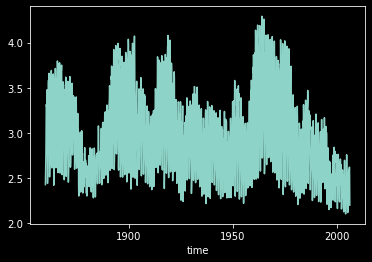

In [9]:
timeseries.plot()

In [10]:
timeseries.time

<xarray.DataArray 'time' (time: 1752)>
array([cftime.DatetimeNoLeap(1860, 1, 16, 12, 0, 0, 0, 6, 16),
       cftime.DatetimeNoLeap(1860, 2, 15, 0, 0, 0, 0, 1, 46),
       cftime.DatetimeNoLeap(1860, 3, 16, 12, 0, 0, 0, 2, 75), ...,
       cftime.DatetimeNoLeap(2005, 10, 16, 12, 0, 0, 0, 4, 289),
       cftime.DatetimeNoLeap(2005, 11, 16, 0, 0, 0, 0, 0, 320),
       cftime.DatetimeNoLeap(2005, 12, 16, 12, 0, 0, 0, 2, 350)], dtype=object)
Coordinates:
  * time     (time) object 1860-01-16 12:00:00 ... 2005-12-16 12:00:00
Attributes:
    long_name:       time
    cartesian_axis:  T
    calendar_type:   noleap
    bounds:          time_bnds
    standard_name:   time
    axis:            T

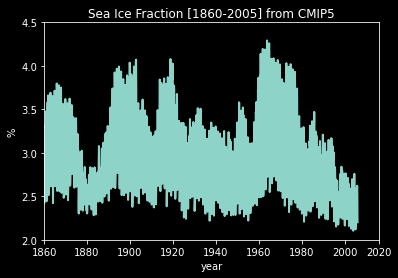

In [11]:

import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np 
plt.style.use('dark_background')

x = range(1, len(timeseries.time)+1)
y = timeseries.values

fig = plt.figure() 
ax = plt.axes(xlim=(1, len(x)), ylim=(2, 4.5)) 
line, = ax.plot([], [], lw=2) 

# initialization function 
def init(): 
    # creating an empty plot/frame 
    line.set_data([], []) 
    return line, 

# lists to store x and y axis points 
xdata, ydata = [], [] 

# animation function 
def animate(i): 

    # x, y values to be plotted 
    x1 = x[i] 
    y1 = y[i] 

   # appending new points to x, y axes points list 
    xdata.append(x1) 
    ydata.append(y1) 
    line.set_data(xdata, ydata) 
    return line, 

# setting a title for the plot 
plt.title('Sea Ice Fraction [1860-2005] from CMIP5') 
# hiding the axis details 
plt.axis('on') 
plt.ylabel('%')
plt.xlabel('year')
plt.xticks([0,240,480,720,960,1200,1440,1680,1872], 
           ['1860', '1880', '1900','1920','1940','1960','1980','2000','2020'])

# call the animator	 
anim = animation.FuncAnimation(fig, animate, init_func=init, 
							frames=len(x), interval=20, blit=True) 

# save the animation as mp4 video file 
anim.save('timeseries.gif',writer='imagemagick') 